# Using Bike Collision and Other Data to Predict Car Accidents #
## Data Re-Wrangling ##

After looking at various machine learning techniques, it becomes clear that I need to interpolate missing values for continuous variables, and fix a few other variables.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import data from the stage before I separated out traffic from other data, and before I
# added all of the -1s for missing values

# read in the cluster data
rd_df = pd.read_csv('data/cleaned_data/agg_clusters.csv', dtype={'shape': 'str',
'bike_acc_ids': 'str',
'car_acc_ids': 'str',
'Jurisdictn': 'str',
'StationID': 'str',
'geometry': 'str',
'road_line': 'str'})

In [3]:
# Drop columns not needed for machine learning and columns with too few non-null values to be useful
model_df = rd_df.drop(columns=['Unnamed: 0.1.1', 'Unnamed: 0', 'Unnamed: 0.1',  'Unnamed: 0_2', 'Unnamed: 0_1', 
                               'shape', 'bike_acc_ids', 'Pd_Sf_Type', 'Rd_Seg_ID', 'Statn_Num', 'StationID',
                              'car_acc_ids', 'Route_ID', 'From_Measure', 'To_Measure', 'Route_Number', 'Fd_Aid_Rd',
                               'St_Name', 'Fm_St_Name', 'To_St_Name', 'Length', 'Shape_Length', 'road_shape', 'geometry',
                               'road_line', 'Urban_Area', 'Pd_Sf_Type', 'Pd_Fc_Type', 'Cr_Slope', 'Path_Width',
                               'Urban_Type', 'Truck', 'Trk_Permit', 'Trk_Netwrk', 'Mile_Count', 'MPO', 'RPA', 'RTA', 'Speed'
                              ])
model_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74122 entries, 0 to 74121
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_acc_score    74122 non-null  float64
 1   bike_acc_score   74122 non-null  float64
 2   car_dens_score   74122 non-null  float64
 3   bike_dens_score  74122 non-null  float64
 4   Route_System     74122 non-null  object 
 5   Route_Direction  68855 non-null  object 
 6   Facility         65737 non-null  float64
 7   F_Class          72378 non-null  float64
 8   F_F_Class        72378 non-null  float64
 9   Jurisdictn       71241 non-null  object 
 10  NHS              72303 non-null  float64
 11  Control          72020 non-null  float64
 12  Num_Lanes        72301 non-null  float64
 13  Opp_Lanes        72301 non-null  float64
 14  Surface_Tp       72071 non-null  float64
 15  Surface_Wd       72071 non-null  float64
 16  Shldr_Rt_W       72078 non-null  float64
 17  Shldr_Rt_T  

In [4]:
# convert car and bike accident scores to integers
model_df['car_acc_score'] = model_df['car_acc_score'].astype(int)
model_df['bike_acc_score'] = model_df['bike_acc_score'].astype(int)

In [5]:
# fill in null values in string codes with 'NA'

list_to_convert = ['Jurisdictn', 'Route_Direction']

for col in list_to_convert:
    model_df[col] = model_df[col].fillna(value='NA')

In [6]:
# a large number of these columns are IDs that stand for qualitative values
# this function fills null values with -1 and converts the column to integers

# -1 also makes sense as a fill value for fields like number of lanes

def fill_and_convert(data, column, make_int=False):
    data[column] = data[column].fillna(value=-1)
    if (make_int):
        data[column] = data[column].astype(int)
    return True

In [7]:
list_to_convert_int = ['Facility', 'F_Class', 'F_F_Class', 'NHS', 'Control', 'Num_Lanes',
                       'Opp_Lanes', 'Surface_Tp', 'Shldr_Rt_T', 'Shldr_Lt_T', 'Shldr_UL_T', 'Med_Type', 
                       'Curb', 'Operation', 'Speed_Lim', 'Op_Dir_SL', 'T_Exc_Type', 'T_Exc_Time', 'Truck_Rte', 
                       'Struct_Cnd', 'Terrain', 'City', 'Mun_Type', 'County', 'Hwy_Dist', 'City_Maint', 
                      'Toll_Road', 'MHS', 'AADT_Year', 'AADT_Deriv']

for col in list_to_convert_int:
    fill_and_convert(model_df, col, make_int=True)
    
list_to_convert_float = ['Surface_Wd', 'Shldr_Rt_W', 'Shldr_Lt_W', 'Shldr_UL_W', 'Med_Width', 'Lt_Sidewlk', 'Rt_Sidewlk', 
                         'ROW_Width', 'AADT', 'traffic_density']

for col in list_to_convert_float:
    fill_and_convert(model_df, col, make_int=False)

model_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74122 entries, 0 to 74121
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_acc_score    74122 non-null  int32  
 1   bike_acc_score   74122 non-null  int32  
 2   car_dens_score   74122 non-null  float64
 3   bike_dens_score  74122 non-null  float64
 4   Route_System     74122 non-null  object 
 5   Route_Direction  74122 non-null  object 
 6   Facility         74122 non-null  int32  
 7   F_Class          74122 non-null  int32  
 8   F_F_Class        74122 non-null  int32  
 9   Jurisdictn       74122 non-null  object 
 10  NHS              74122 non-null  int32  
 11  Control          74122 non-null  int32  
 12  Num_Lanes        74122 non-null  int32  
 13  Opp_Lanes        74122 non-null  int32  
 14  Surface_Tp       74122 non-null  int32  
 15  Surface_Wd       74122 non-null  float64
 16  Shldr_Rt_W       74122 non-null  float64
 17  Shldr_Rt_T  

In [8]:
# Examining float columns to see if there are discrete values, and get information for interpolating

for col in list_to_convert_float:
    counts = pd.DataFrame(np.unique(model_df[col], return_counts=True))
    print(col)
    print(counts)
    print()

Surface_Wd
       0        1     2    3      4     5      6     7      8      9   ...  \
0    -1.0      0.0   6.0  7.0    8.0   9.0   10.0  11.0   12.0   13.0  ...   
1  2051.0  10319.0  17.0  6.0  572.0  64.0  477.0  54.0  810.0  176.0  ...   

     58    59    60    61    62    63    64    65    66    67  
0  63.0  64.0  65.0  66.0  68.0  70.0  71.0  75.0  76.0  80.0  
1   7.0  38.0  58.0   8.0  16.0  68.0   3.0  13.0   4.0  52.0  

[2 rows x 68 columns]

Shldr_Rt_W
        0        1       2       3      4      5     6      7     8      9  \
0    -1.0      0.0     1.0     2.0    3.0    4.0   5.0    6.0   7.0    8.0   
1  2044.0  63473.0  1045.0  4939.0  377.0  916.0  90.0  278.0  48.0  587.0   

     10     11    12    13    14    15    16    17  
0   9.0   10.0  11.0  12.0  13.0  14.0  20.0  25.0  
1  31.0  177.0  14.0  79.0   3.0  14.0   1.0   6.0  

Shldr_Lt_W
        0        1      2      3     4      5     6     7
0    -1.0      0.0    1.0    2.0   3.0    4.0   6.0   8.0
1  20

In [9]:
model_df[list_to_convert_float].describe()

,Surface_Wd,Shldr_Rt_W,Shldr_Lt_W,Shldr_UL_W,Med_Width,Lt_Sidewlk,Rt_Sidewlk,ROW_Width,AADT,traffic_density
count,74122.000000,74122.000000,74122.000000,74122.000000,74122.000000,74122.000000,74122.000000,74122.000000,74122.000000,7.412200e+04
mean,24.103734,0.328917,0.019778,0.001106,2.348048,4.026483,5.302474,47.652303,11674.527239,1.267862e+03
std,13.869579,1.302439,0.390228,0.439695,12.894142,4.057091,4.209655,36.883101,24589.336231,1.618337e+05
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1154.000000,0.000000e+00
50%,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,41.000000,1154.000000,0.000000e+00
75%,33.000000,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,60.000000,11282.000000,2.037869e+00
max,80.000000,25.000000,8.000000,10.000000,240.000000,28.000000,30.000000,300.000000,224649.000000,3.773565e+07


In [10]:
model_df[['Num_Lanes', 'Opp_Lanes', 'Med_Width', 'Med_Type']].describe()

,Num_Lanes,Opp_Lanes,Med_Width,Med_Type
count,74122.000000,74122.000000,74122.000000,74122.000000
mean,1.752718,0.352082,2.348048,0.272632
std,0.938645,0.917876,12.894142,1.084276
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000
max,5.000000,4.000000,240.000000,6.000000


In [11]:
# if there is no Median, then the Median width should be zero
model_df['Med_Width'] = model_df['Med_Width'].mask((model_df['Med_Width'] < 0) & (model_df['Med_Type'] == 0), 0)

In [12]:
# Number of Travel Lanes/Opposite (Num_Lanes, Opp_Lanes)
# Number of travel lanes in any direction of travel on an undivided road. Divided roadways note number of lanes on 
# the given segment only, using the opposite number of lanes field to identify the number of lanes in opposing traffic.

# if opp lanes is specified, and num lanes is not, then num lanes should be the same
model_df['Num_Lanes'] = model_df['Num_Lanes'].mask((model_df['Num_Lanes'] <= 0) & (model_df['Opp_Lanes'] > 0), 
                                                   model_df['Opp_Lanes'])

# if a road has a median, probably has at least 4 lanes
model_df['Num_Lanes'] = model_df['Num_Lanes'].mask((model_df['Num_Lanes'] <= 0) & (model_df['Med_Width'] > 0), 4)

# now update thhe rest to mean
mean = round(np.mean(model_df[model_df['Num_Lanes'] > 0]['Num_Lanes']))
model_df['Num_Lanes'] = model_df['Num_Lanes'].mask(model_df['Num_Lanes'] <= 0, mean)
model_df['Num_Lanes'].describe()

# if a road is one lane then opp lanes should be 0
model_df['Opp_Lanes'] = model_df['Opp_Lanes'].mask(model_df['Opp_Lanes'] < 0, 0)

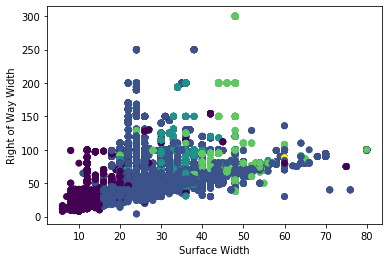

In [13]:
# Surface_Wd is surface width, which should never be 0, similarly row_width
# Let's look at the relationship between Surface_Wd and ROW_Width where they are 
# both greater than zero.

surf_df = model_df.query('Surface_Wd > 0 & ROW_Width > 0 & Num_Lanes > 0')
plt.scatter(surf_df['Surface_Wd'], surf_df['ROW_Width'], c=surf_df['Num_Lanes'])
plt.ylabel('Right of Way Width')
plt.xlabel('Surface Width')
plt.show()

In [14]:
# are the roads missing surface width the same as right of way width?

print('Num rows with either <= 0')
print(len(model_df.query('Surface_Wd <= 0 | ROW_Width <= 0')))
print('Num rows with both <= 0')
print(len(model_df.query('Surface_Wd <= 0 & ROW_Width <= 0')))

Num rows with either <= 0
13862
Num rows with both <= 0
11639


In [15]:
# there is a lot of overlap, but I can still fix about 2000 with a linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(surf_df[['Surface_Wd', 'Num_Lanes']], surf_df['ROW_Width'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
fixed_row_wd = np.array(model_df['ROW_Width'])
update_count = 0
for index, row in model_df.iterrows():
    if (row['ROW_Width'] <= 0) and (row['Surface_Wd'] > 0) and (row['Num_Lanes'] > 0):
        fixed_row_wd[index] = lr.intercept_ + lr.coef_[0] * row['Surface_Wd'] + lr.coef_[1] * row['Num_Lanes']
        update_count += 1
model_df['ROW_Width'] = fixed_row_wd
print('{} rows updated'.format(update_count))
        

1492 rows updated


In [17]:
# now fit the opposite way to fix missing Surface Width values

lr.fit(surf_df[['ROW_Width', 'Num_Lanes']], surf_df['Surface_Wd'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
fixed_surf_wd = np.array(model_df['Surface_Wd'])
update_count = 0
for index, row in model_df.iterrows():
    if (row['Surface_Wd'] <= 0) and (row['ROW_Width'] > 0) and (row['Num_Lanes'] > 0):
        fixed_surf_wd[index] = lr.intercept_ + lr.coef_[0] * row['ROW_Width'] + lr.coef_[1] * row['Num_Lanes']
        update_count += 1
model_df['Surface_Wd'] = fixed_surf_wd
print('{} rows updated'.format(update_count))

731 rows updated


In [19]:
# we can use this to fix some missing lane numbers too but with rounding because num_lanes is an integer
lr.fit(surf_df[['ROW_Width', 'Surface_Wd']], surf_df['Num_Lanes'])
fixed_lanes = np.array(model_df['Num_Lanes'])
update_count = 0
for index, row in model_df.iterrows():
    if (row['Num_Lanes'] <= 0) and (row['ROW_Width'] > 0) and (row['Surface_Wd'] > 0):
        fixed_lanes[index] = round(lr.intercept_ + lr.coef_[0] * row['ROW_Width'] + lr.coef_[1] * row['Surface_Wd'])
        update_count += 1
model_df['Num_Lanes'] = fixed_lanes
print('{} rows updated'.format(update_count))

0 rows updated


In [20]:
# still missing a lot of rows, unfortunately. Let's see if we can get anywhere without Num_Lanes
lr.fit(surf_df[['Surface_Wd']], surf_df['ROW_Width'])
fixed_surf_wd = np.array(model_df['Surface_Wd'])
update_count = 0
for index, row in model_df.iterrows():
    if (row['Surface_Wd'] <= 0) and (row['ROW_Width'] > 0):
        fixed_surf_wd[index] = lr.intercept_ + lr.coef_[0] * row['ROW_Width']
        update_count += 1
model_df['Surface_Wd'] = fixed_surf_wd
print('{} rows updated'.format(update_count))

0 rows updated


In [21]:
lr.fit(surf_df[['ROW_Width']], surf_df['Surface_Wd'])
fixed_row_wd = np.array(model_df['ROW_Width'])
update_count = 0
for index, row in model_df.iterrows():
    if (row['ROW_Width'] <= 0) and (row['Surface_Wd'] > 0):
        fixed_row_wd[index] = lr.intercept_ + lr.coef_[0] * row['Surface_Wd']
        update_count += 1
model_df['ROW_Width'] = fixed_row_wd
print('{} rows updated'.format(update_count))

0 rows updated


In [22]:
# now going to replace the rest with the mean
rep_w_mean_list_1 = ['Surface_Wd', 'ROW_Width', 'AADT', 'traffic_density']

for col in rep_w_mean_list_1:
    mean = np.mean(model_df[model_df[col] > 0][col])
    model_df[col] = model_df[col].mask(model_df[col] <= 0, mean)
    
# these columns may have 0 values
    
rep_w_mean_list_2 = ['Shldr_Rt_W', 'Shldr_Lt_W', 'Shldr_UL_W', 'Med_Width', 'Lt_Sidewlk', 'Rt_Sidewlk']

for col in rep_w_mean_list_2:
    mean = np.mean(model_df[model_df[col] >= 0][col])
    model_df[col] = model_df[col].mask(model_df[col] < 0, mean)

In [23]:
model_df[list_to_convert_float].describe()

,Surface_Wd,Shldr_Rt_W,Shldr_Lt_W,Shldr_UL_W,Med_Width,Lt_Sidewlk,Rt_Sidewlk,ROW_Width,AADT,traffic_density
count,74122.000000,74122.000000,74122.000000,74122.00000,74122.000000,74122.000000,74122.000000,74122.000000,74122.000000,7.412200e+04
mean,28.938072,0.366603,0.048799,0.02961,2.448446,4.168738,5.480841,58.090537,13968.546893,2.742477e+03
std,8.638126,1.283069,0.350261,0.40595,12.881100,3.967989,4.073945,29.281594,24038.535853,1.618279e+05
min,6.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,10.000000,4.238931e-04
25%,24.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,1154.000000,2.994103e+00
50%,28.000000,0.000000,0.000000,0.00000,0.000000,4.168738,6.000000,52.000000,9946.000000,2.742477e+03
75%,33.000000,0.000000,0.000000,0.00000,0.000000,7.000000,8.000000,61.000000,13968.546893,2.742477e+03
max,80.000000,25.000000,8.000000,10.00000,240.000000,28.000000,30.000000,300.000000,224649.000000,3.773565e+07


In [24]:
model_df[['Speed_Lim', 'Op_Dir_SL']].describe()

,Speed_Lim,Op_Dir_SL
count,74122.000000,74122.000000
mean,26.084806,20.010577
std,36.065503,36.668146
min,-1.000000,-1.000000
25%,-1.000000,-1.000000
50%,-1.000000,-1.000000
75%,30.000000,30.000000
max,99.000000,99.000000


In [25]:
# a speed limit of 99 makes no sense, but what else do we know about those roads
model_df.query('Speed_Lim > 90')['NHS'].describe()

count    12570.000000
mean         1.435084
std          4.059698
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: NHS, dtype: float64

In [26]:
# this implies they're mostly on the interstate meaning that the speed limit 
# is going to be at least 55

# what is the mean speed limit of interstates in boston
mean_interstate_speed = np.mean(model_df.query('NHS >= 1 & Speed_Lim > 0 & Speed_Lim < 90')['Speed_Lim'])
print('Mean interstate speed limit in Boston is {}'.format(mean_interstate_speed))

Mean interstate speed limit in Boston is 31.608067671768904


In [27]:
# where speed limit is not known, it should be the opposite side speed limit
model_df['Speed_Lim'] = model_df['Speed_Lim'].mask(((model_df['Speed_Lim'] <= 0) | (model_df['Speed_Lim'] > 90)) & 
                                           (model_df['Op_Dir_SL'] > 0), model_df['Op_Dir_SL'])
                                           
# where the speed limit is greater than 90, it should be the mean interstate speed limit that makes sense
model_df['Speed_Lim'] = model_df['Speed_Lim'].mask(model_df['Speed_Lim'] > 90, 30)

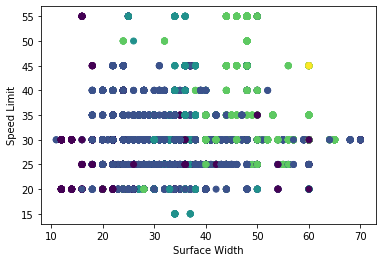

In [28]:
# let's see if we can model speed limit from surface_width
speed_df = surf_df.query('Speed_Lim > 0 & Speed_Lim < 90')
plt.scatter(speed_df['Surface_Wd'], speed_df['Speed_Lim'], c=speed_df['Num_Lanes'])
plt.xlabel('Surface Width')
plt.ylabel('Speed Limit')
plt.show()

In [29]:
# define rounding function so we can get speed limits in units of 5 as they always are in the real world
def myround(x, base=5):
    return base * round(x/base)

myround(33.2)

35

In [30]:
# based on that, number of lanes seems like a better predictor
lr.fit(surf_df[['Num_Lanes']], surf_df['Speed_Lim'])
fixed_sl = np.array(model_df['Speed_Lim'])
update_count = 0
for index, row in model_df.iterrows():
    if (row['Speed_Lim'] <= 0) and (row['Num_Lanes'] > 0):
        fixed_sl[index] = myround(lr.intercept_ + lr.coef_[0] * row['Num_Lanes'])
        update_count += 1
        
model_df['Speed_Lim'] = fixed_sl
print('{} rows updated'.format(update_count))


37898 rows updated


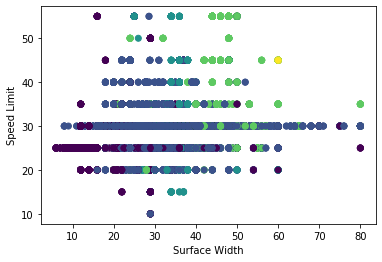

In [31]:
# take a look at graph to see how that worked out
plt.scatter(model_df['Surface_Wd'], model_df['Speed_Lim'], c=model_df['Num_Lanes'])
plt.xlabel('Surface Width')
plt.ylabel('Speed Limit')
plt.show()

In [32]:
# update opposite direction speed limit to be the same as speed limit where it is not specified
model_df['Op_Dir_SL'] = model_df['Op_Dir_SL'].mask(model_df['Op_Dir_SL'] <= 0, model_df['Speed_Lim'])

In [34]:
# this is a good time to export the cleaned data before I convert everything to dummy variables
model_df.to_csv(r'data/cleaned_data/model_df.csv')

In [35]:
# convert dataframe to dataframe with dummies for all categorical variables
md_dum = pd.get_dummies(model_df, columns=['Num_Lanes', 'Route_System', 'Route_Direction', 'Facility',
                                           'F_Class', 'F_F_Class', 'Jurisdictn', 'NHS', 'Control', 'Opp_Lanes', 
                                           'Surface_Tp', 'Surface_Wd', 'Shldr_Rt_W', 'Shldr_Rt_T', 'Shldr_Lt_T',
                                           'Shldr_UL_T', 'Med_Type', 'Curb', 'Operation', 'T_Exc_Type', 'T_Exc_Time',
                                           'Truck_Rte', 'Struct_Cnd', 'Terrain', 'Toll_Road', 'MHS', 'City',
                                           'Mun_Type', 'County', 'Hwy_Dist', 'City_Maint', 'AADT_Year',
                                           'AADT_Deriv'])

In [36]:
md_dum.to_csv(r'data/cleaned_data/md_dum.csv')